In [1]:
import numpy as np
import emcee 
import matplotlib.pyplot as plt
import corner 
import math

np.random.seed(42)

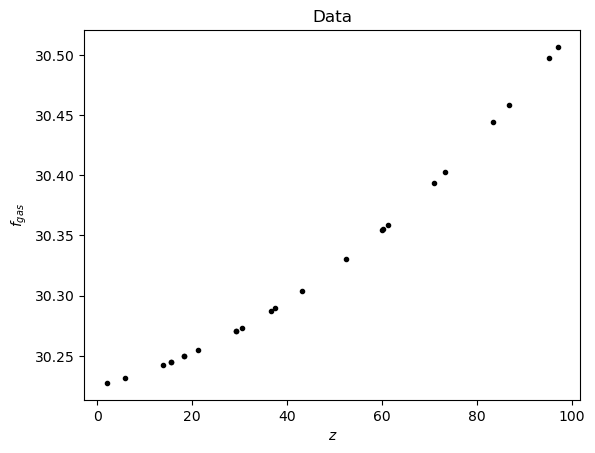

In [2]:
#data
N = 24
def dgen(x):
    return 30.225437 + 0.00095904*x + 0.5*0.00004*(x**2)
z = np.random.uniform(0, 100, N)
fgas = dgen(z)
fgerr = np.random.uniform(0,0.00001, size=z.shape)

plt.errorbar(z,fgas,yerr = fgerr, fmt=".k", capsize=0)
plt.title('Data')
plt.xlabel(r'$z$')
plt.ylabel(r'$f_{gas}$')
plt.show()

In [3]:
# Model

def model1(params, t):
    f0,f1,f2 = params
    return f0 + f1*t +f2*0.5*(t**2)
def lnlike1(p, t, y, yerr):
    return -0.5 * np.sum(((y - model1(p, t))/yerr) ** 2)

In [4]:
def lnprior1(p):
    f0,f1,f2 = p
    if (29 < f0 < 31 and  0.0009 < f1 < 0.00099 and 0.00003 < f2 < 0.00005):
        return 0.0
    return -np.inf

def lnprob1(p, x, y, yerr):
    lp = lnprior1(p)
    return lp + lnlike1(p, x, y, yerr) if np.isfinite(lp) else -np.inf

In [5]:

initial = np.array([30.22,0.00091,0.000035])
nwalkers = 240
ndim = len(initial)
data = (z,fgas,fgerr)
p0 = [np.array(initial) + 1e-8 * np.random.randn(ndim)
      for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob1, args=data)

print("Running burn-in...")
p0, _, _ = sampler.run_mcmc(p0, 500)
sampler.reset()

print("Running production...")
sampler.run_mcmc(p0, 1000)

Running burn-in...
Running production...


State([[3.02254365e+01 9.59057124e-04 3.99997626e-05]
 [3.02254370e+01 9.59058150e-04 3.99992498e-05]
 [3.02254361e+01 9.59082172e-04 3.99988422e-05]
 [3.02254354e+01 9.59130766e-04 3.99979709e-05]
 [3.02254373e+01 9.59011409e-04 4.00008623e-05]
 [3.02254373e+01 9.59033474e-04 4.00003023e-05]
 [3.02254359e+01 9.59083800e-04 3.99990442e-05]
 [3.02254365e+01 9.59070276e-04 3.99992265e-05]
 [3.02254374e+01 9.59028970e-04 4.00004321e-05]
 [3.02254376e+01 9.59030819e-04 3.99994804e-05]
 [3.02254360e+01 9.59136711e-04 3.99971487e-05]
 [3.02254383e+01 9.58985064e-04 4.00011491e-05]
 [3.02254377e+01 9.59009374e-04 4.00004815e-05]
 [3.02254386e+01 9.58985474e-04 4.00010310e-05]
 [3.02254382e+01 9.58979872e-04 4.00010722e-05]
 [3.02254374e+01 9.59060774e-04 3.99990308e-05]
 [3.02254392e+01 9.58939212e-04 4.00020078e-05]
 [3.02254366e+01 9.59078261e-04 3.99987258e-05]
 [3.02254370e+01 9.59039197e-04 3.99998548e-05]
 [3.02254372e+01 9.59010206e-04 4.00006884e-05]
 [3.02254371e+01 9.59032388e-04 4.

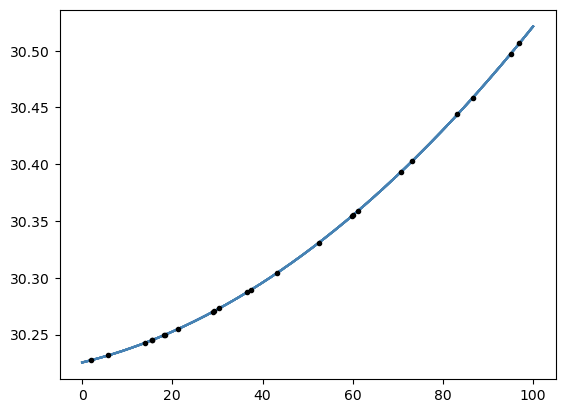

In [6]:
import matplotlib.pyplot as pl

# Plot the data.
plt.errorbar(z, fgas, yerr=fgerr, fmt=".k", capsize=0)

# The positions where the prediction should be computed.
x = np.linspace(0, 100, 500)

# Plot 24 posterior samples.
samples = sampler.flatchain
for s in samples[np.random.randint(len(samples), size=24)]:
    plt.plot(x, model1(s, x), color="#4682b4", alpha=0.3)

In [7]:
# Extract the parameter values from the samples
for i in range(3):
    param_values = samples.T[i, :]  # Assuming the first column is the parameter
    #print(param_values)
    # Calculate mean and standard deviation
    mean_param = np.mean(param_values)
    std_param = np.std(param_values)

    # Print the results
    print(f"Mean parameter: {mean_param} ± {std_param}")

Mean parameter: 30.225437008610456 ± 9.62705924510626e-07
Mean parameter: 0.0009590396276575723 ± 4.886000799284622e-08
Mean parameter: 4.000000827365149e-05 ± 1.1439444859555651e-09


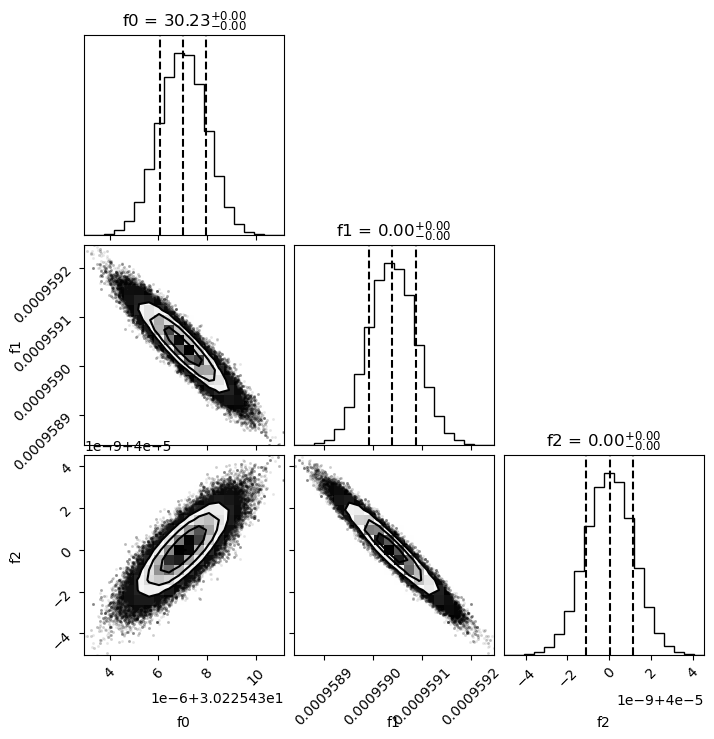

In [8]:
labels = ['f0','f1','f2']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])